In [19]:
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
from visualize_placement import visualize_placement
import networkx as nx
import pickle
import matplotlib.pyplot as plt

In [20]:
G = pickle.load( open('data/network_digital_twin_v0.2.pickle','rb'))

In [21]:
a = nx.shortest_path(G,"8864461", "8860547", weight='length_m')
harbour_exits = pickle.load( open("data/harbour_exits.p", "rb") )

In [22]:
harbour_exits[:5]

['8861581', '8860954', '8865802', '8864595', '8866901']

In [23]:
# Let's see whether the program works for the route from Brielle to Schwinhaven (near Zwijndrecht)
#now also added
df_b, df_g, df_eq_fq = first_stage_frlm(G, 40000, [("8864461", "8860547", 30)])

In [24]:
df_b

,"(8867784, 8864235, 8866899)","(8867784, 8864235, 8867023)","(8867784, 8864235, 8863810)"
q,,,
"(8864461, 8860547)",1,1,1


In [25]:
df_g

8867784  8867023  8863810  \
q                  h                                                        
(8864461, 8860547) (8867784, 8864235, 8867023)        2        2        0   
                   (8867784, 8864235, 8863810)        2        0        2   
                   (8867784, 8864235, 8866899)        2        0        0   

                                                8864235  8866899  
q                  h                                              
(8864461, 8860547) (8867784, 8864235, 8867023)        1        0  
                   (8867784, 8864235, 8863810)        1        0  
                   (8867784, 8864235, 8866899)        1        1

In [26]:
df_eq_fq

,e_q,f_q
q,,
"(8864461, 8860547)",1.0,30


In [27]:
optimal_facilities, optimal_flows = second_stage_frlm(6, 20, df_g, df_b, df_eq_fq)

CFRLM:
MAXIMIZE
30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8863810')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8866899')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8867023')) + 0
SUBJECT TO
_C1: - 20 Facilities_8867784
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8863810'))
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8866899'))
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8867023'))
 <= 0

_C2: - 20 Facilities_8867023
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8867023'))
 <= 0

_C3: - 20 Facilities_8863810
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8863810'))
 <= 0

_C4: - 20 Facilities_8864235
 + 30 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8863810'))
 + 30 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8866899'))
 + 30 Flow_captured_(('8864461',_'886

In [28]:
optimal_flows

{Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8863810')): 0.0,
 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8866899')): 0.66666667,
 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8864235',_'8867023')): 0.0}

## Seems to go quite okay!
Also try with multiple OD sets for illustration

In [29]:
#now also added: Brielle to Middelharnis and Brielle to Ridderkerk
%time df_b, df_g, df_eq_fq = first_stage_frlm(G, 60000, [("8864461", "8860547", 30), ("8864461", "8862620", 20), ("8864461", "8860687", 10)])

CPU times: total: 7.45 s
Wall time: 7.51 s
CPU times: total: 6.81 s
Wall time: 6.81 s


In [30]:
df_b

,"(8861736, 8867528)","(8867588, 8862585)","(8867784, 8863810)","(8865086, 8861736)","(8865818, 8862585)","(8866686, 8861736)","(8864235, 8866899)","(8863988, 8865803)","(8864235, 8864009)","(8865086, 8862585)",...,"(8864235, 8867588)","(8862585, 8864009)","(8867588, 8861736)","(8863988, 8862585)","(8867784, 8866899)","(8864482, 8864009)","(8864235, 8867528)","(8865818, 8861736)","(8864235, 8867023)","(8864482, 8865818)"
q,,,,,,,,,,,,,,,,,,,,,
"(8864461, 8860547)",0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
"(8864461, 8862620)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(8864461, 8860687)",1,1,0,1,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,0,1


,"(8861736, 8867528)","(8867588, 8862585)","(8867784, 8863810)","(8865086, 8861736)","(8865818, 8862585)","(8866686, 8861736)","(8864235, 8866899)","(8863988, 8865803)","(8864235, 8864009)","(8865086, 8862585)",...,"(8864235, 8867588)","(8862585, 8864009)","(8867588, 8861736)","(8863988, 8862585)","(8867784, 8866899)","(8864482, 8864009)","(8864235, 8867528)","(8865818, 8861736)","(8864235, 8867023)","(8864482, 8865818)"
q,,,,,,,,,,,,,,,,,,,,,
"(8864461, 8860547)",0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
"(8864461, 8862620)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(8864461, 8860687)",1,1,0,1,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,0,1


In [31]:
df_g

8867784  8865818  8861736  8865086  \
q                  h                                                        
(8864461, 8860547) (8864235, 8867023)        0        0        0        0   
                   (8863810, 8864235)        0        0        0        0   
                   (8864235, 8866899)        0        0        0        0   
                   (8867784, 8867023)        2        0        0        0   
                   (8867784, 8863810)        2        0        0        0   
                   (8867784, 8866899)        2        0        0        0   
(8864461, 8862620) (8867784, 8860968)        2        0        0        0   
(8864461, 8860687) (8864235, 8863988)        0        0        0        0   
                   (8864235, 8865086)        0        0        0        2   
                   (8864235, 8865818)        0        2        0        0   
                   (8864235, 8867528)        0        0        0        0   
                   (8864235, 8864009)        0        0        0        0   
                   (8864235, 8867588)        0        0        0        0   
                   (8864235, 8866686)        0        0        0        0   
                   (8863988, 8865803)        0        0        0        0   
                   (8865086, 8865803)        0        0        0        2   
                   (8865818, 8865803)        0        2        0        0   
                   (8867528, 8865803)        0        0        0        0   
                   (8865803, 8864009)        0        0        0        0   
                   (8867588, 8865803)        0        0        0        0   
                   (8866686, 8865803)        0        0        0        0   
                   (8863988, 8862585)        0        0        0        0   
                   (8865086, 8862585)        0        0        0        2   
                   (8865818, 8862585)        0        2        0        0   
                   (8867528, 8862585)        0        0        0        0   
                   (8862585, 8864009)        0        0        0        0   
                   (8867588, 8862585)        0        0        0        0   
                   (8866686, 8862585)        0        0        0        0   
                   (8864482, 8863988)        0        0        0        0   
                   (8864482, 8865086)        0        0        0        2   
                   (8864482, 8865818)        0        2        0        0   
                   (8864482, 8867528)        0        0        0        0   
                   (8864482, 8864009)        0        0        0        0   
                   (8864482, 8867588)        0        0        0        0   
                   (8864482, 8866686)        0        0        0        0   
                   (8863988, 8861736)        0        0        2        0   
                   (8865086, 8861736)        0        0        2        2   
                   (8865818, 8861736)        0        2        2        0   
                   (8861736, 8867528)        0        0        2        0   
                   (8861736, 8864009)        0        0        2        0   
                   (8867588, 8861736)        0        0        2        0   
                   (8866686, 8861736)        0        0        2        0   

                                       8866686  8867023  8862585  8863810  \
q                  h                                                        
(8864461, 8860547) (8864235, 8867023)        0        2        0        0   
                   (8863810, 8864235)        0        0        0        2   
                   (8864235, 8866899)        0        0        0        0   
                   (8867784, 8867023)        0        2        0        0   
                   (8867784, 8863810)        0        0        0        2   
                   (8867784, 8866899)        0        0        0        0   
(8864461, 8862620) (8867784, 88609

8867784  8865818  8861736  8865086  \
q                  h                                                        
(8864461, 8860547) (8864235, 8867023)        0        0        0        0   
                   (8863810, 8864235)        0        0        0        0   
                   (8864235, 8866899)        0        0        0        0   
                   (8867784, 8867023)        2        0        0        0   
                   (8867784, 8863810)        2        0        0        0   
                   (8867784, 8866899)        2        0        0        0   
(8864461, 8862620) (8867784, 8860968)        2        0        0        0   
(8864461, 8860687) (8864235, 8863988)        0        0        0        0   
                   (8864235, 8865086)        0        0        0        2   
                   (8864235, 8865818)        0        2        0        0   
                   (8864235, 8867528)        0        0        0        0   
                   (8864235, 8864009)        0        0        0        0   
                   (8864235, 8867588)        0        0        0        0   
                   (8864235, 8866686)        0        0        0        0   
                   (8863988, 8865803)        0        0        0        0   
                   (8865086, 8865803)        0        0        0        2   
                   (8865818, 8865803)        0        2        0        0   
                   (8867528, 8865803)        0        0        0        0   
                   (8865803, 8864009)        0        0        0        0   
                   (8867588, 8865803)        0        0        0        0   
                   (8866686, 8865803)        0        0        0        0   
                   (8863988, 8862585)        0        0        0        0   
                   (8865086, 8862585)        0        0        0        2   
                   (8865818, 8862585)        0        2        0        0   
                   (8867528, 8862585)        0        0        0        0   
                   (8862585, 8864009)        0        0        0        0   
                   (8867588, 8862585)        0        0        0        0   
                   (8866686, 8862585)        0        0        0        0   
                   (8864482, 8863988)        0        0        0        0   
                   (8864482, 8865086)        0        0        0        2   
                   (8864482, 8865818)        0        2        0        0   
                   (8864482, 8867528)        0        0        0        0   
                   (8864482, 8864009)        0        0        0        0   
                   (8864482, 8867588)        0        0        0        0   
                   (8864482, 8866686)        0        0        0        0   
                   (8863988, 8861736)        0        0        2        0   
                   (8865086, 8861736)        0        0        2        2   
                   (8865818, 8861736)        0        2        2        0   
                   (8861736, 8867528)        0        0        2        0   
                   (8861736, 8864009)        0        0        2        0   
                   (8867588, 8861736)        0        0        2        0   
                   (8866686, 8861736)        0        0        2        0   

                                       8866686  8867023  8862585  8863810  \
q                  h                                                        
(8864461, 8860547) (8864235, 8867023)        0        2        0        0   
                   (8863810, 8864235)        0        0        0        2   
                   (8864235, 8866899)        0        0        0        0   
                   (8867784, 8867023)        0        2        0        0   
                   (8867784, 8863810)        0        0        0        2   
                   (8867784, 8866899)        0        0        0        0   
(8864461, 8862620) (8867784, 88609

In [32]:
%time optimal_facilities, optimal_flows = second_stage_frlm(7, 20, df_g, df_b, df_eq_fq)

CFRLM:
MAXIMIZE
30*Flow_captured_(('8864461',_'8860547'),_('8863810',_'8864235')) + 30*Flow_captured_(('8864461',_'8860547'),_('8864235',_'8866899')) + 30*Flow_captured_(('8864461',_'8860547'),_('8864235',_'8867023')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8863810')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8866899')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8867023')) + 10*Flow_captured_(('8864461',_'8860687'),_('8861736',_'8864009')) + 10*Flow_captured_(('8864461',_'8860687'),_('8861736',_'8867528')) + 10*Flow_captured_(('8864461',_'8860687'),_('8862585',_'8864009')) + 10*Flow_captured_(('8864461',_'8860687'),_('8863988',_'8861736')) + 10*Flow_captured_(('8864461',_'8860687'),_('8863988',_'8862585')) + 10*Flow_captured_(('8864461',_'8860687'),_('8863988',_'8865803')) + 10*Flow_captured_(('8864461',_'8860687'),_('8864235',_'8863988')) + 10*Flow_captured_(('8864461',_'8860687'),_('8864235',_'8864009')) + 10*Flow_captured_(('8864461',_'8

In [33]:
optimal_facilities

{'8860968': 1,
 '8861736': 0,
 '8862585': 0,
 '8863810': 0,
 '8863988': 0,
 '8864009': 0,
 '8864235': 2,
 '8864482': 0,
 '8865086': 0,
 '8865803': 0,
 '8865818': 0,
 '8866686': 1,
 '8866899': 2,
 '8867023': 0,
 '8867528': 0,
 '8867588': 0,
 '8867784': 1}

{'8860968': 1,
 '8861736': 0,
 '8862585': 0,
 '8863810': 0,
 '8863988': 0,
 '8864009': 0,
 '8864235': 2,
 '8864482': 0,
 '8865086': 0,
 '8865803': 0,
 '8865818': 0,
 '8866686': 1,
 '8866899': 2,
 '8867023': 0,
 '8867528': 0,
 '8867588': 0,
 '8867784': 1}

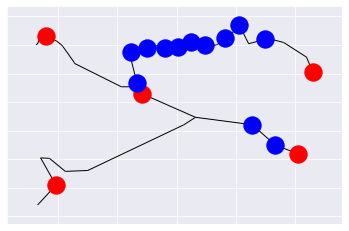

In [37]:
# Draw network, routes and charging stations

#Define new graph H with only nodes and edges in routes

OD_list = [("8864461", "8860547", 30), ("8864461", "8862620", 20), ("8864461", "8860687", 10)]

# OD_list = [("8864461", "8860547", 30)]#, ("8864461", "8862620", 20), ("8864461", "8860687", 10)]

# OD_list = [("8864991", "8863072", 10)]
node_list =[]
for origin, destination, flow in OD_list:
    for node in nx.dijkstra_path(G, origin, destination, weight='length_m'):
        if node not in node_list:
            node_list.append(node)

H = G.subgraph(node_list)

#create pos dict
pos_dict = {}
for node in node_list:
    pos_dict[node] = (G.nodes[node]['X'],G.nodes[node]['Y'])





other_ks =[]
fuel_stations = []

for key, number_of_stations in optimal_facilities.items():
    if number_of_stations > 0:
        fuel_stations.append(key)
    else:
        other_ks.append(key)


# x = nx.get_node_attributes(H, 'X')
# y = nx.get_node_attributes(H, 'Y')

# for key, item in x.items():
#     pos_dict[key] = (x[key],y[key])
# pos = (x,y)
    # print(pos)

# print(fuel_stations)
# H2 = H.subgraph[fuel_stations]
#
nx.draw_networkx_edges(H, pos = pos_dict)

nx.draw_networkx_nodes(G,pos_dict, fuel_stations, node_color='red')
nx.draw_networkx_nodes(G,pos_dict,other_ks, node_color='blue')
plt.show()

In [38]:
OD_list = [("8864461", "8860547", 30), ("8864461", "8862620", 20), ("8864461", "8860687", 10)]


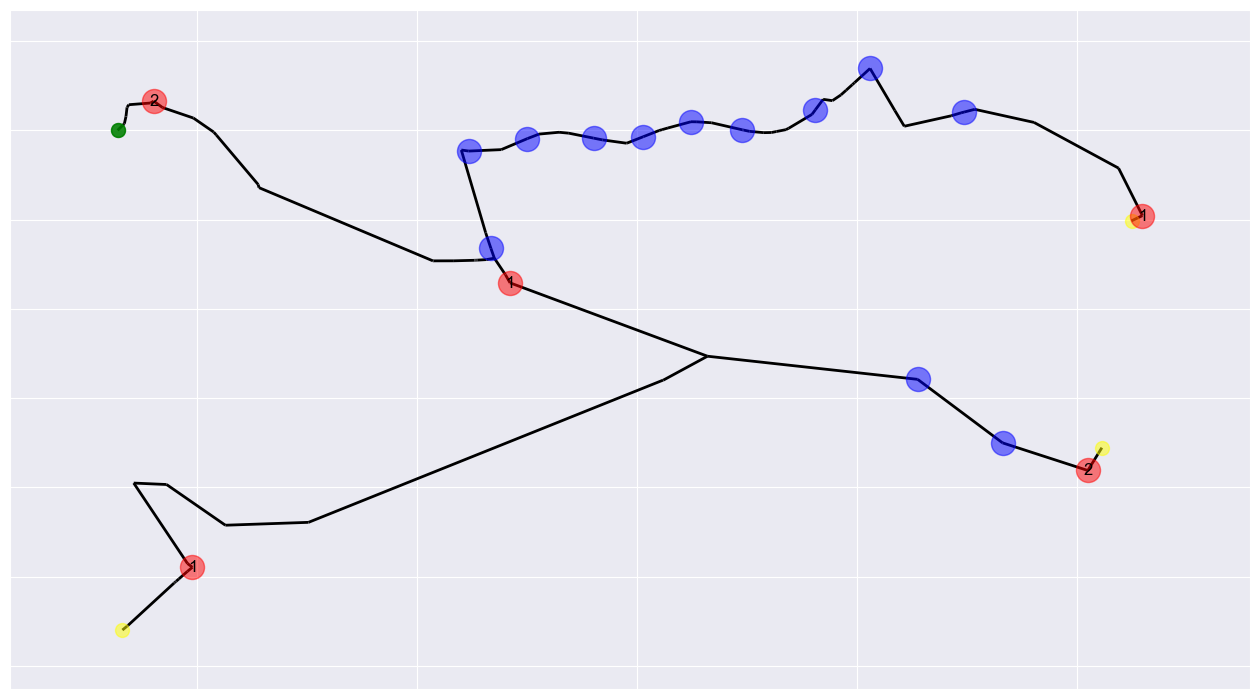

In [40]:
visualize_placement(G, OD_list, optimal_facilities, True)